Ingo 22/5/2024
# Example Dashboard
## Bar color demo
This is an example showing how to control bar color and legend entries using the color and label parameters of bar. Note that labels with a preceding underscore won't show up in the legend.

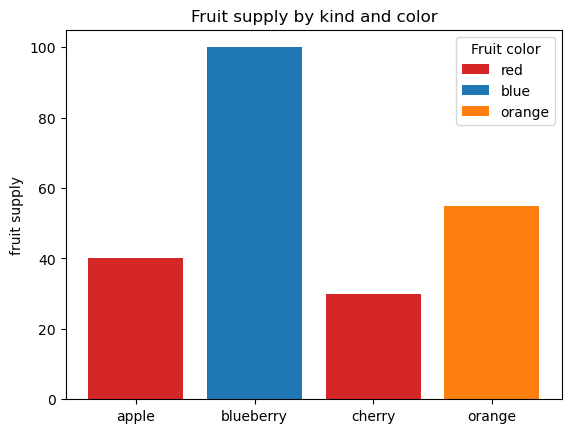

In [1]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

# Curve with error band
This example illustrates how to draw an error band around a parametrized curve.

A parametrized curve $x(t), y(t)$ can directly be drawn using plot.

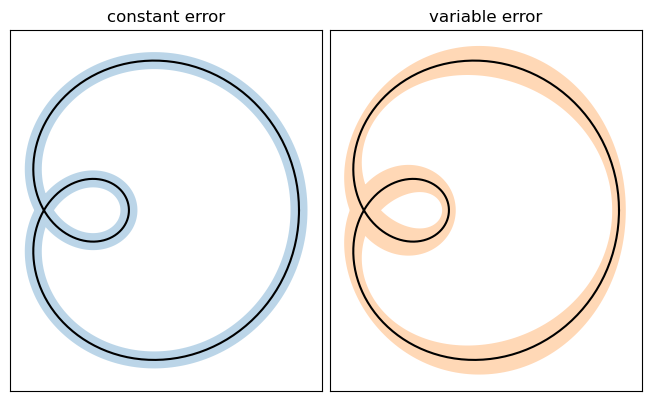

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import PathPatch
from matplotlib.path import Path

N = 400
t = np.linspace(0, 2 * np.pi, N)
r = 0.5 + np.cos(t)
x, y = r * np.cos(t), r * np.sin(t)

# fig, ax = plt.subplots()
# ax.plot(x, y, "k")
# ax.set(aspect=1)

def draw_error_band(ax, x, y, err, **kwargs):
    # Calculate normals via centered finite differences (except the first point
    # which uses a forward difference and the last point which uses a backward
    # difference).
    dx = np.concatenate([[x[1] - x[0]], x[2:] - x[:-2], [x[-1] - x[-2]]])
    dy = np.concatenate([[y[1] - y[0]], y[2:] - y[:-2], [y[-1] - y[-2]]])
    l = np.hypot(dx, dy)
    nx = dy / l
    ny = -dx / l

    # end points of errors
    xp = x + nx * err
    yp = y + ny * err
    xn = x - nx * err
    yn = y - ny * err

    vertices = np.block([[xp, xn[::-1]],
                         [yp, yn[::-1]]]).T
    codes = np.full(len(vertices), Path.LINETO)
    codes[0] = codes[len(xp)] = Path.MOVETO
    path = Path(vertices, codes)
    ax.add_patch(PathPatch(path, **kwargs))


_, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True)
errs = [
    (axs[0], "constant error", 0.05),
    (axs[1], "variable error", 0.05 * np.sin(2 * t) ** 2 + 0.04),
]
for i, (ax, title, err) in enumerate(errs):
    ax.set(title=title, aspect=1, xticks=[], yticks=[])
    ax.plot(x, y, "k")
    draw_error_band(ax, x, y, err=err,
                    facecolor=f"C{i}", edgecolor="none", alpha=.3)

plt.show()